In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import os
from sklearn.metrics import *

In [13]:
path = 'Results/'
list_data = os.listdir(path)
list_data.remove('IMG')
list_data

['breastcancer_pred.pkl',
 'breastcancer_true.pkl',
 'early_stage_pred.pkl',
 'early_stage_true.pkl',
 'heart_disease_pred.pkl',
 'heart_disease_true.pkl',
 'pima_pred.pkl',
 'pima_true.pkl']

In [14]:
data = []
for i in range(len(list_data)):
    temp = {}
    temp['Name'] = list_data[i][:-9]
    temp['Data'] = pickle.load(open(path+list_data[i], 'rb'))
    data.append(temp)

In [15]:
df = pd.DataFrame(columns=['Data', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUROC'])
type(df)

pandas.core.frame.DataFrame

In [16]:
from torchmetrics.functional.classification import binary_accuracy, binary_precision, binary_recall, binary_f1_score, binary_auroc
import torch

In [17]:
accuracy = []
precision = []
recall = []
f1_score = []
auroc = []

for i in range(10):
    trues = torch.tensor(data[1]['Data'][i])
    preds = torch.tensor(data[0]['Data'][i].flatten())
    accuracy.append(binary_accuracy(preds=preds, target=trues).item())
    precision.append(binary_precision(preds=preds, target=trues).item())
    recall.append(binary_recall(preds=preds, target=trues).item())
    f1_score.append(binary_f1_score(preds=preds, target=trues).item())
    auroc.append(binary_auroc(preds.float(), trues.long()).item())

temp = {
    'Data': 'Breast Cancer',
    'Accuracy': np.mean(accuracy),
    'Precision': np.mean(precision),
    'Recall': np.mean(recall),
    'F1 Score': np.mean(f1_score),
    'AUROC': np.mean(auroc)
}

df = pd.concat([df, pd.DataFrame(temp, index=[0])], ignore_index=True)
df

C:\Users\Muhammad Rifqi Fauzi\AppData\Local\Temp\ipykernel_7468\2439635668.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame(temp, index=[0])], ignore_index=True)


,Data,Accuracy,Precision,Recall,F1 Score,AUROC
0,Breast Cancer,0.959524,0.970903,0.926554,0.945975,0.99343


In [18]:
accuracy = []
precision = []
recall = []
f1_score = []
auroc = []

for i in range(10):
    trues = torch.tensor(data[3]['Data'][i])
    preds = torch.tensor(data[2]['Data'][i].flatten())
    accuracy.append(binary_accuracy(preds=preds, target=trues).item())
    precision.append(binary_precision(preds=preds, target=trues).item())
    recall.append(binary_recall(preds=preds, target=trues).item())
    f1_score.append(binary_f1_score(preds=preds, target=trues).item())
    auroc.append(binary_auroc(preds.float(), trues.long()).item())

temp = {
    'Data': 'Early Stage Risk',
    'Accuracy': np.mean(accuracy),
    'Precision': np.mean(precision),
    'Recall': np.mean(recall),
    'F1 Score': np.mean(f1_score),
    'AUROC': np.mean(auroc)
}

df = pd.concat([df, pd.DataFrame(temp, index=[0])], ignore_index=True)
df

,Data,Accuracy,Precision,Recall,F1 Score,AUROC
0,Breast Cancer,0.959524,0.970903,0.926554,0.945975,0.993430
1,Early Stage Risk,0.876462,0.927899,0.889724,0.905578,0.955518


In [19]:
from torchmetrics.functional.classification import multilabel_accuracy, multilabel_precision, multilabel_recall, multilabel_f1_score, multilabel_auroc

accuracy = []
precision = []
recall = []
f1_score = []
auroc = []

for i in range(10):
    trues = torch.tensor(data[5]['Data'][i])
    preds = torch.tensor(data[4]['Data'][i])
    accuracy.append(multilabel_accuracy(preds=preds, target=trues, num_labels=5).item())
    precision.append(multilabel_precision(preds=preds, target=trues, num_labels=5).item())
    recall.append(multilabel_recall(preds=preds, target=trues, num_labels=5).item())
    f1_score.append(multilabel_f1_score(preds=preds, target=trues, num_labels=5).item())
    auroc.append(multilabel_auroc(preds.float(), trues.long(), num_labels=5).item())

temp = {
    'Data': 'Heart Disease',
    'Accuracy': np.mean(accuracy),
    'Precision': np.mean(precision),
    'Recall': np.mean(recall),
    'F1 Score': np.mean(f1_score),
    'AUROC': np.mean(auroc)
}

df = pd.concat([df, pd.DataFrame(temp, index=[0])], ignore_index=True)


f:\Program Files\Anaconda\envs\py310\lib\site-packages\torchmetrics\utilities\prints.py:43: UserWarning: No positive samples in targets, true positive value should be meaningless. Returning zero tensor in true positive score
  warnings.warn(*args, **kwargs)  # noqa: B028


In [20]:
accuracy = []
precision = []
recall = []
f1_score = []
auroc = []

for i in range(10):
    trues = torch.tensor(data[7]['Data'][i])
    preds = torch.tensor(data[6]['Data'][i].flatten())
    accuracy.append(binary_accuracy(preds=preds, target=trues).item())
    precision.append(binary_precision(preds=preds, target=trues).item())
    recall.append(binary_recall(preds=preds, target=trues).item())
    f1_score.append(binary_f1_score(preds=preds, target=trues).item())
    auroc.append(binary_auroc(preds.float(), trues.long()).item())

temp = {
    'Data': 'PIMA',
    'Accuracy': np.mean(accuracy),
    'Precision': np.mean(precision),
    'Recall': np.mean(recall),
    'F1 Score': np.mean(f1_score),
    'AUROC': np.mean(auroc)
}

df = pd.concat([df, pd.DataFrame(temp, index=[0])], ignore_index=True)
df

,Data,Accuracy,Precision,Recall,F1 Score,AUROC
0,Breast Cancer,0.959524,0.970903,0.926554,0.945975,0.993430
1,Early Stage Risk,0.876462,0.927899,0.889724,0.905578,0.955518
2,Heart Disease,0.883957,0.196870,0.182099,0.183475,0.779736
3,PIMA,0.748735,0.699554,0.503180,0.567237,0.831365


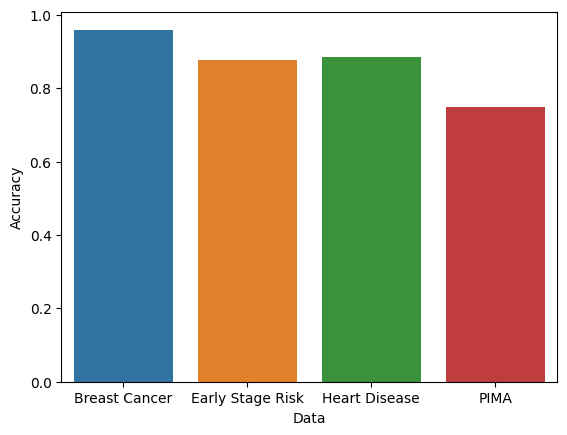

In [61]:
acc = sns.barplot(data=df, x='Data', y='Accuracy', hue='Data')
plt.savefig('Results/IMG/Accuracy.png', dpi=600, bbox_inches='tight')

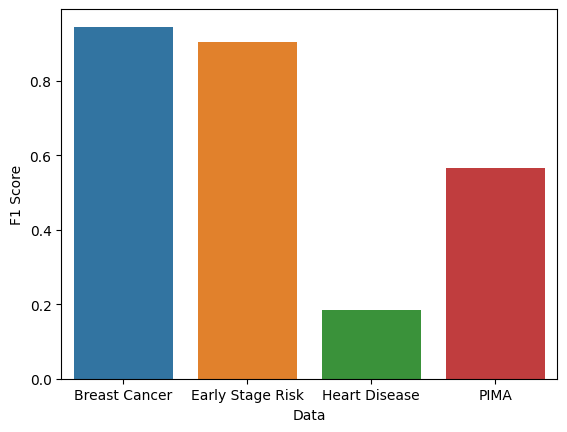

In [62]:
f1 = sns.barplot(data=df, x='Data', y='F1 Score', hue='Data')
plt.savefig('Results/IMG/F1 Score.png', dpi=600, bbox_inches='tight')

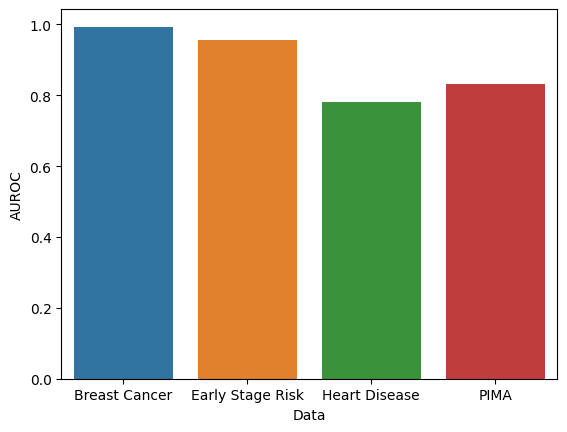

In [63]:
auc = sns.barplot(data=df, x='Data', y='AUROC', hue='Data')
plt.savefig('Results/IMG/AUROC.png', dpi=600, bbox_inches='tight')

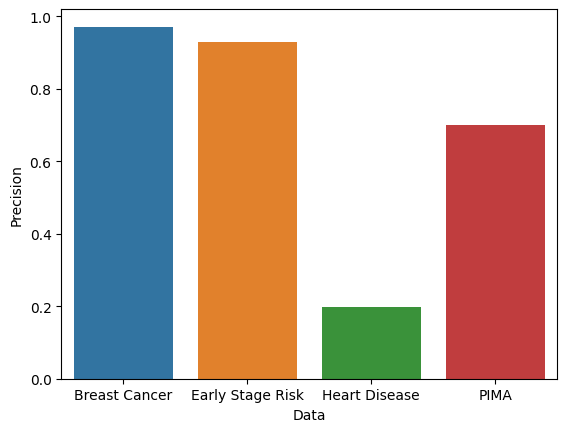

In [64]:
prec = sns.barplot(data=df, x='Data', y='Precision', hue='Data')
plt.savefig('Results/IMG/Precision.png', dpi=600, bbox_inches='tight')

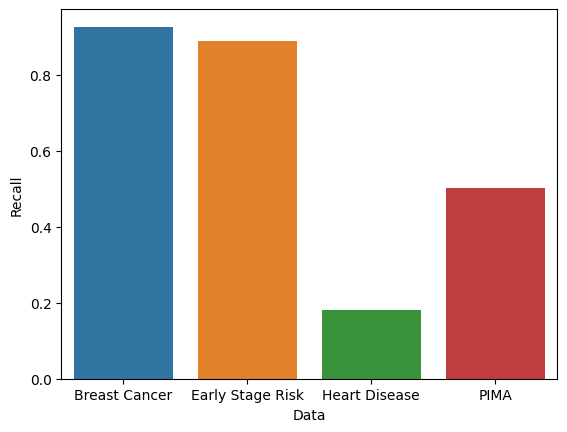

In [65]:
rec = sns.barplot(data=df, x='Data', y='Recall', hue='Data')
plt.savefig('Results/IMG/Recall.png', dpi=600, bbox_inches='tight')

torch.Size([57, 1]) torch.Size([57, 1])


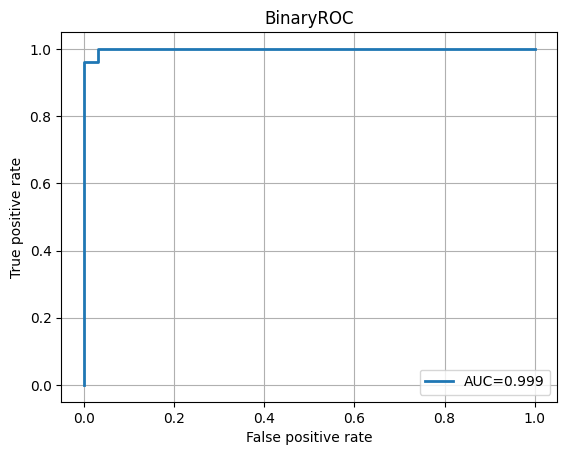

In [55]:
from torchmetrics.classification import BinaryROC
trues = torch.tensor(data[1]['Data'][1], dtype=torch.int).unsqueeze(1)
preds = torch.tensor(data[0]['Data'][1])
print(trues.shape, preds.shape)
metric = BinaryROC()
metric.update(preds, trues)
fig_, ax_ = metric.plot(score=True)

plt.savefig('Results/IMG/ROC_Breastcancer.png', dpi=600, bbox_inches='tight')

torch.Size([26, 1]) torch.Size([26, 1])


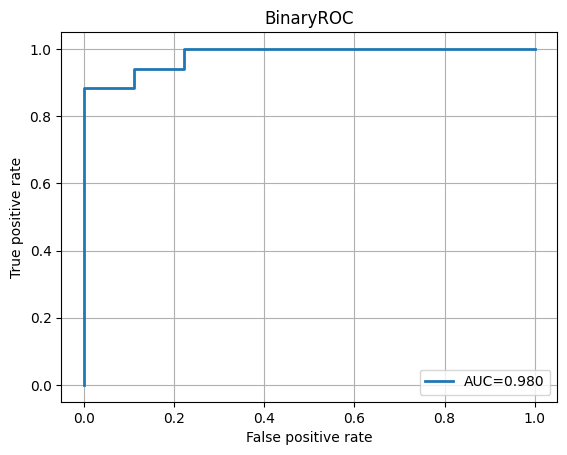

In [58]:
from torchmetrics.classification import BinaryROC
trues = torch.tensor(data[3]['Data'][0], dtype=torch.int).unsqueeze(1)
preds = torch.tensor(data[2]['Data'][0])
print(trues.shape, preds.shape)
metric = BinaryROC()
metric.update(preds, trues)
fig_, ax_ = metric.plot(score=True)

plt.savefig('Results/IMG/ROC_early_stage.png', dpi=600, bbox_inches='tight')

torch.Size([31, 5]) torch.Size([31, 5])


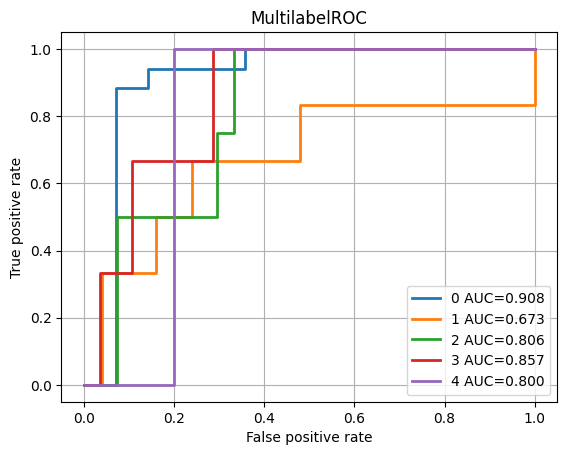

In [69]:
from torchmetrics.classification import BinaryROC, MulticlassROC, MultilabelROC
trues = torch.tensor(data[5]['Data'][1], dtype=torch.int).squeeze(0)
preds = torch.tensor(data[4]['Data'][1])
print(trues.shape, preds.shape)
metric = MultilabelROC(num_labels=5)
metric.update(preds, trues)
fig_, ax_ = metric.plot(score=True)

plt.savefig('Results/IMG/ROC_heartdisease.png', dpi=600, bbox_inches='tight')

torch.Size([77]) torch.Size([77])


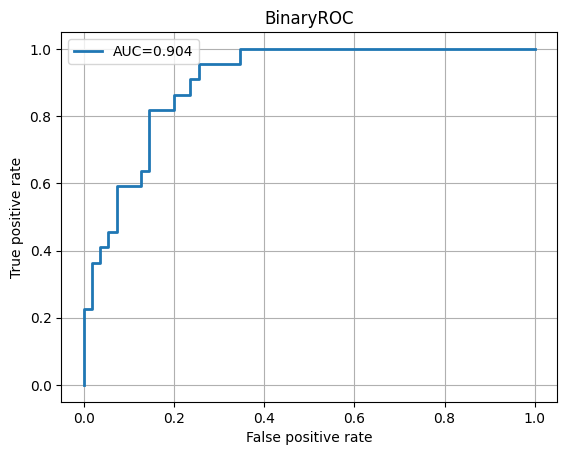

In [77]:
from torchmetrics.classification import BinaryROC
trues = torch.tensor(data[7]['Data'][3], dtype=torch.long)
preds = torch.tensor(data[6]['Data'][3]).squeeze(1)
print(trues.shape, preds.shape)
metric = BinaryROC()
metric.update(preds, trues)
fig_, ax_ = metric.plot(score=True)

plt.savefig('Results/IMG/ROC_pima.png', dpi=600, bbox_inches='tight')